## Real Estate Price Predictor

In [1]:
import pandas as pd
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')

The dataset (Boston Housing Price) was taken from the StatLib library which is maintained at Carnegie Mellon University and is freely available for download from the UCI Machine Learning Repository. The dataset consists of 506 observations of 14 attributes. The median value of house price in $10000s, denoted by MEDV, is the outcome or the dependent variable in our model. Below is a brief description of each feature and the outcome in our dataset: Variables:

In [2]:
housing = pd.read_csv('C:/Users/Amit Baghel/Desktop/Housing Price Prediction/data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


CRIM – per capita crime rate by town.

ZN – proportion of residential land zoned for lots over 25,000 sq.ft.

CHAS – Charles River dummy variable (1 if tract bounds river; else 0) 4. NOX – nitric oxides concentration (parts per 10 million).

RM – average number of rooms per dwelling.

AGE – proportion of owner-occupied units built prior to 1940.

DIS – weighted distances to five Boston employment centres.

RAD – index of accessibility to radial highways.

INDUS – proportion of non-retail business acres per town.

TAX – full-value property-tax rate per $10,000.

PTRATIO – pupil-teacher ratio by town.

B – 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 13. LSTAT – % lower status of the population.

LSTAT - % lower status of the population.

MEDV – Median value of owner-occupied homes in $10000’s.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,505.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287325,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.704474,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885000,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.630000,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [6]:
housing['ZN'].value_counts()

0.0      377
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [7]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[: test_set_size]
    train_indices =  shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing, 0.2)
len(train_set),len(test_set)

(409, 102)

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
len(train_set),len(test_set)

(408, 103)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing ['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [10]:
strat_test_set['CHAS'].value_counts()

0    96
1     7
Name: CHAS, dtype: int64

In [11]:
strat_train_set['CHAS'].value_counts()

0    380
1     28
Name: CHAS, dtype: int64

In [12]:
96/7

13.714285714285714

In [13]:
380/28

13.571428571428571

In [14]:
housing = strat_train_set.copy()

In [15]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.681481
B          0.350283
ZN         0.341767
DIS        0.250670
CHAS       0.191563
AGE       -0.366230
RAD       -0.381955
CRIM      -0.395849
NOX       -0.425104
TAX       -0.467171
PTRATIO   -0.475870
INDUS     -0.481414
LSTAT     -0.720350
Name: MEDV, dtype: float64

<AxesSubplot:>

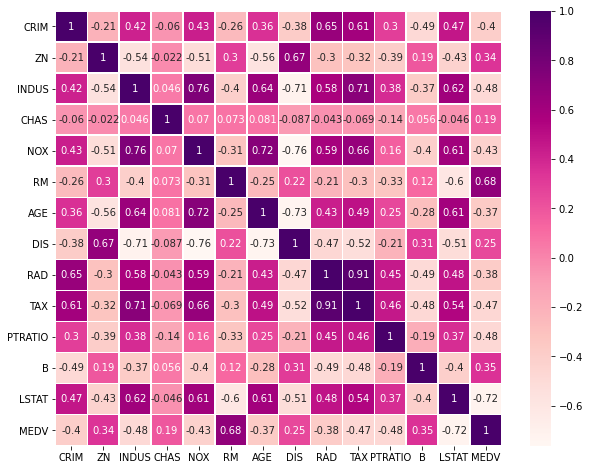

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,8))
corr=housing.corr(method='pearson')
sns.heatmap(corr, annot=True,linewidths=.5,cmap = 'RdPu')

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

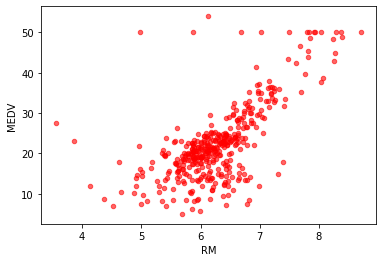

In [17]:
housing.plot(kind ='scatter', x = 'RM', y = 'MEDV', alpha = 0.6, color ='red')

### Attribute combinations

In [18]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1,68.959436
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,187.026116
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03,31.1,38.970588
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9,NaN


<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

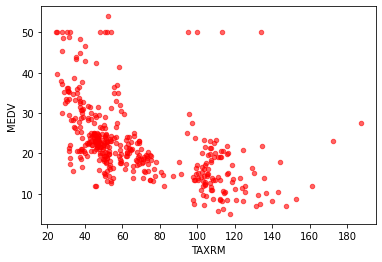

In [19]:
housing.plot(kind ='scatter', x = 'TAXRM', y = 'MEDV', alpha = 0.6, color ='red')

In [20]:
housing = strat_train_set.drop('MEDV', axis = 1)
housing_labels = strat_train_set['MEDV'].copy()

To take care missing attributes, you have three options:

    1. Get rid of the missing data points
    2. Get rid of the whole attribute
    3. Set the value to some value(0, mean, mode or medien)

In [21]:
method1= housing.dropna(subset= ['RM']) #option 1
method1.shape

(403, 13)

In [22]:
housing.drop('RM', axis = True).shape # option 2

(408, 12)

In [23]:
median = housing['RM'].median() #option 3
housing['RM'].fillna(median)

495    5.670
254    6.108
365    3.561
193    6.800
35     6.208
       ...  
386    4.652
243    6.393
22     6.142
480    6.242
455    6.525
Name: RM, Length: 408, dtype: float64

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20800e+00, 7.79500e+01, 3.10730e+00, 5.00000e+00, 3.35000e+02,
       1.90500e+01, 3.90980e+02, 1.17050e+01])

In [26]:
x = imputer.transform(housing)
housing_transform = pd.DataFrame(x, columns = housing.columns)

In [27]:
housing_transform.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,408.000000,408.000000,408.00000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,3.574915,10.730392,11.37527,0.068627,0.558200,6.268260,69.169363,3.738277,9.666667,411.227941,18.500245,353.601397,12.920907
std,8.066171,22.067428,6.83855,0.253130,0.116078,0.699504,28.275511,2.085949,8.716483,168.222809,2.143483,95.566677,7.230954
min,0.006320,0.000000,0.74000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.087962,0.000000,5.32000,0.000000,0.453000,5.878750,45.075000,2.062000,4.000000,284.000000,17.400000,374.617500,6.927500
50%,0.286735,0.000000,9.90000,0.000000,0.538000,6.208000,77.950000,3.107300,5.000000,335.000000,19.050000,390.980000,11.705000
75%,3.716457,12.500000,18.10000,0.000000,0.625750,6.626000,94.150000,4.978850,24.000000,666.000000,20.200000,395.645000,17.272500
max,73.534100,100.000000,27.74000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,36.980000


### Scikit Learn Design

Primarily, three types of objects:

    1. Estimators - it estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method.
       Fit method - Fits the dataset and calculates internal parameters.
    
    2. Transformers- transform method takes input and returns output based on the learning from fit(). It also has as 
       convenience function called fit_transform() which fits and then transforms.
       
    3. Predictors - LinearRegression model is an example of predictor. fit()  function predict() are two common functions. 
       It also gives score() which will evaluate the predictions.

### Feature Scaling

Primarly, two types of feature scaling methods:
    
    1. Min- MAX scaling (Normalization)
       (Value - min)/(max - min)
       Sklearn provides a class called MinMaxScaler for this.
       
    2. Standardization
       (value - mean)/std
       Sklearn provides a class called Standard Scaler for this.

### Creating a Pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy ='median')),
    ('std_scaler', StandardScaler()),
])

In [29]:
housing_transform = my_pipeline.fit_transform(housing_transform)
housing_transform

array([[-0.42152521, -0.48685178, -0.24673925, ...,  0.3268577 ,
         0.41580739,  0.64788652],
       [-0.43776099,  3.14285176, -1.1325159 , ..., -0.98103103,
         0.41161669, -0.87937274],
       [ 0.12176277, -0.48685178,  0.9845635 , ...,  0.79396081,
         0.01150978, -0.80321747],
       ...,
       [-0.29076014, -0.48685178, -0.47367376, ...,  1.1676433 ,
         0.45362844,  0.80296634],
       [ 0.27917289, -0.48685178,  0.9845635 , ...,  0.79396081,
         0.45362844, -0.30197735],
       [ 0.14615368, -0.48685178,  0.9845635 , ...,  0.79396081,
        -3.17111595,  0.7212725 ]])

In [30]:
housing_transform.shape

(408, 13)

### Using Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing_transform, housing_labels)

LinearRegression()

In [32]:
lr.coef_

array([-0.65434634,  0.81583897,  0.04707379,  0.91691834, -1.82222014,
        2.96023898,  0.08636991, -2.77149468,  2.198271  , -1.83981846,
       -1.79814589,  0.92387194, -3.69164348])

In [33]:
lr_predictions = lr.predict(housing_transform)

Text(0, 0.5, 'Predicted Y')

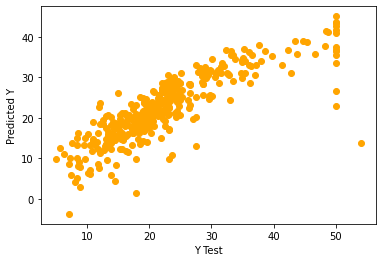

In [34]:
plt.scatter(housing_labels, lr_predictions, color='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [35]:
lr_predicion = pd.DataFrame({'Actual':housing_labels, 'Predicted': lr_predictions})
lr_predicion

,Actual,Predicted
495,23.1,16.883233
254,21.9,23.725555
365,27.5,12.994197
193,31.1,31.708570
35,18.9,24.928651
...,...,...
386,10.5,6.112061
243,23.7,27.139582
22,15.2,16.515915
480,23.0,23.252310


In [36]:
from sklearn import metrics

In [37]:
print('MAE :'," ", metrics.mean_absolute_error(housing_labels, lr_predictions))
print('MSE :'," ",metrics.mean_squared_error(housing_labels, lr_predictions))
print('RMAE:'," ", np.sqrt(metrics.mean_squared_error(housing_labels, lr_predictions)))

MAE :   3.4024028170252114
MSE :   25.653747676684862
RMAE:   5.064952880006374


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

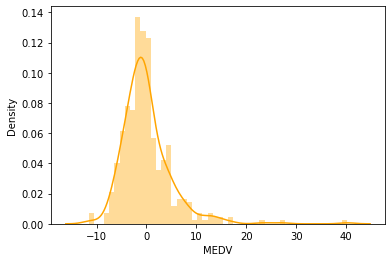

In [38]:
sns.distplot(housing_labels- lr_predictions, bins=50 , color = 'orange')

In [39]:
some_data = housing.iloc[:20]
some_labels = housing_labels.iloc[:20]
some_labels.head()

495    23.1
254    21.9
365    27.5
193    31.1
35     18.9
Name: MEDV, dtype: float64

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
lr.predict(prepared_data)

array([16.88323294, 23.72555498, 12.99419684, 31.70857022, 24.92865062,
       12.26685219, 24.96256807, 26.66304561, 27.06482408, 25.49900244,
       25.8197753 , 20.88291041, 18.38699496, 16.32310163, 30.38441529,
       14.04816617, 24.05076038, 12.31887093, 22.86659252,  8.59381667])

In [42]:
print(some_labels)

495    23.1
254    21.9
365    27.5
193    31.1
35     18.9
143    15.6
96     21.4
94     20.6
481    23.7
293    23.9
314    23.8
69     20.9
469    20.1
136    17.4
305    28.4
496    19.7
75     21.4
445    11.8
38     24.7
144    11.8
Name: MEDV, dtype: float64


**Using better evalution technique - Cross Validation | Linear Regression**

In [43]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, housing_transform, housing_labels, scoring ='neg_mean_squared_error', cv = 3)
print('RMAE:'," ", np.sqrt(-lr_scores).mean())

RMAE:   5.387644359172993


### Using Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(housing_transform, housing_labels)

DecisionTreeRegressor()

In [45]:
dtr_predictions = dtr.predict(housing_transform)

In [46]:
dtr.predict(prepared_data)

array([23.1, 21.9, 27.5, 31.1, 18.9, 15.6, 21.4, 20.6, 23.7, 23.9, 23.8,
       20.9, 20.1, 17.4, 28.4, 19.7, 21.4, 11.8, 24.7, 11.8])

In [47]:
some_labels.head()

495    23.1
254    21.9
365    27.5
193    31.1
35     18.9
Name: MEDV, dtype: float64

Text(0, 0.5, 'Predicted Y')

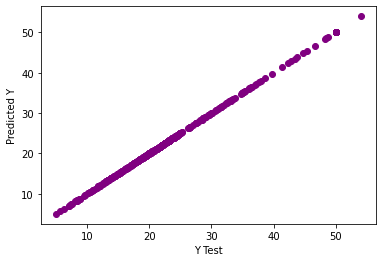

In [48]:
plt.scatter(housing_labels, dtr_predictions, color='purple')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [49]:
print('MAE :'," ", metrics.mean_absolute_error(housing_labels, dtr_predictions))
print('MSE :'," ",metrics.mean_squared_error(housing_labels,dtr_predictions))
print('RMAE:'," ", np.sqrt(metrics.mean_squared_error(housing_labels,dtr_predictions)))

MAE :   0.0
MSE :   0.0
RMAE:   0.0


**Using better evalution technique - Cross Validation | Decision Tree**

In [50]:
dtr_scores = cross_val_score(dtr, housing_transform, housing_labels, scoring ='neg_mean_squared_error', cv = 10)
print('RMAE:'," ", np.sqrt(-dtr_scores).mean())

RMAE:   4.417289786229782


### Using Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(housing_transform, housing_labels)

RandomForestRegressor()

In [52]:
rfr_predictions = rfr.predict(housing_transform)

In [53]:
rfr.predict(prepared_data)

array([21.632, 22.446, 26.507, 30.677, 20.544, 14.737, 22.067, 21.17 ,
       25.25 , 23.434, 23.78 , 20.999, 19.392, 17.023, 27.214, 19.016,
       22.167, 11.016, 23.475, 12.522])

Text(0, 0.5, 'Predicted Y')

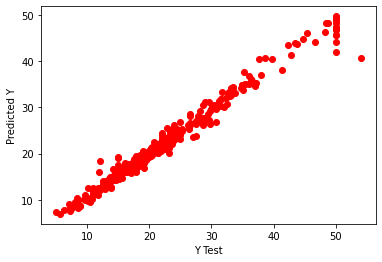

In [54]:
plt.scatter(housing_labels, rfr_predictions, color='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [55]:
rfr_predicion = pd.DataFrame({'Actual':housing_labels, 'Predicted': rfr_predictions})
rfr_predicion

,Actual,Predicted
495,23.1,21.632
254,21.9,22.446
365,27.5,26.507
193,31.1,30.677
35,18.9,20.544
...,...,...
386,10.5,9.756
243,23.7,23.925
22,15.2,15.841
480,23.0,22.196


In [56]:
print('MAE :'," ", metrics.mean_absolute_error(housing_labels, rfr_predictions))
print('MSE :'," ",metrics.mean_squared_error(housing_labels,rfr_predictions))
print('RMAE:'," ", np.sqrt(metrics.mean_squared_error(housing_labels,rfr_predictions)))

MAE :   0.8965171568627431
MSE :   2.088945203431369
RMAE:   1.4453183744183733


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

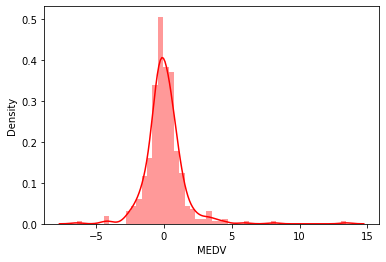

In [57]:
sns.distplot(housing_labels- rfr_predictions, bins=50 , color = 'red')

Hence, As you can see, the RandomForest regressor showed the best accuracy, so we decided to use this algorithm for production.